# B-trees bachelor thesis CSV data visualization
## Anton Rigin

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import interpolate

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
from shapely.geometry import LineString

In [4]:
df = pd.read_csv('btrees_coef_exps.csv', sep=';', encoding='utf8')

In [5]:
df.head()

,Tree Order,Keys Order,Insertions Count,Deletions Count,B-tree Time,B-tree Max Used Memory,B+-tree Time,B+-tree Max Used Memory,B*-tree Time,B*-tree Max Used Memory,B*+-tree Time,B*+-tree Max Used Memory
0,100,Increasing,500,500,15,14253,15,14277,14,14543,18,15609
1,100,Increasing,501,499,12,14253,12,14277,13,14543,14,15609
2,100,Increasing,502,498,11,14253,10,14277,13,14543,13,15609
3,100,Increasing,503,497,10,14253,10,14277,13,14543,13,15609
4,100,Increasing,504,496,11,14253,12,14277,13,14543,14,15609


In [6]:
df.tail()

,Tree Order,Keys Order,Insertions Count,Deletions Count,B-tree Time,B-tree Max Used Memory,B+-tree Time,B+-tree Max Used Memory,B*-tree Time,B*-tree Max Used Memory,B*+-tree Time,B*+-tree Max Used Memory
28552,1000,Random,996,4,10,0,10,0,10,0,10,0
28553,1000,Random,997,3,10,0,10,0,10,0,9,0
28554,1000,Random,998,2,10,0,10,0,10,0,11,0
28555,1000,Random,999,1,10,0,11,0,11,0,10,0
28556,1000,Random,1000,0,12,0,16,0,10,0,10,0


In [7]:
increasing_df = df[df['Keys Order'] == 'Increasing']
decreasing_df = df[df['Keys Order'] == 'Decreasing']
random_df = df[df['Keys Order'] == 'Random']

In [8]:
tree_orders = increasing_df[increasing_df['Insertions Count'] == 500]['Tree Order'].values
tree_orders

array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
        650,  700,  750,  800,  850,  900,  950, 1000], dtype=int64)

In [105]:
insertions_count = increasing_df[increasing_df['Tree Order'] == 100]['Insertions Count'].values
insertions_count

array([ 500,  501,  502,  503,  504,  505,  506,  507,  508,  509,  510,
        511,  512,  513,  514,  515,  516,  517,  518,  519,  520,  521,
        522,  523,  524,  525,  526,  527,  528,  529,  530,  531,  532,
        533,  534,  535,  536,  537,  538,  539,  540,  541,  542,  543,
        544,  545,  546,  547,  548,  549,  550,  551,  552,  553,  554,
        555,  556,  557,  558,  559,  560,  561,  562,  563,  564,  565,
        566,  567,  568,  569,  570,  571,  572,  573,  574,  575,  576,
        577,  578,  579,  580,  581,  582,  583,  584,  585,  586,  587,
        588,  589,  590,  591,  592,  593,  594,  595,  596,  597,  598,
        599,  600,  601,  602,  603,  604,  605,  606,  607,  608,  609,
        610,  611,  612,  613,  614,  615,  616,  617,  618,  619,  620,
        621,  622,  623,  624,  625,  626,  627,  628,  629,  630,  631,
        632,  633,  634,  635,  636,  637,  638,  639,  640,  641,  642,
        643,  644,  645,  646,  647,  648,  649,  6

In [108]:
insertions_percent = insertions_count / 10.0
insertions_percent

array([  50. ,   50.1,   50.2,   50.3,   50.4,   50.5,   50.6,   50.7,
         50.8,   50.9,   51. ,   51.1,   51.2,   51.3,   51.4,   51.5,
         51.6,   51.7,   51.8,   51.9,   52. ,   52.1,   52.2,   52.3,
         52.4,   52.5,   52.6,   52.7,   52.8,   52.9,   53. ,   53.1,
         53.2,   53.3,   53.4,   53.5,   53.6,   53.7,   53.8,   53.9,
         54. ,   54.1,   54.2,   54.3,   54.4,   54.5,   54.6,   54.7,
         54.8,   54.9,   55. ,   55.1,   55.2,   55.3,   55.4,   55.5,
         55.6,   55.7,   55.8,   55.9,   56. ,   56.1,   56.2,   56.3,
         56.4,   56.5,   56.6,   56.7,   56.8,   56.9,   57. ,   57.1,
         57.2,   57.3,   57.4,   57.5,   57.6,   57.7,   57.8,   57.9,
         58. ,   58.1,   58.2,   58.3,   58.4,   58.5,   58.6,   58.7,
         58.8,   58.9,   59. ,   59.1,   59.2,   59.3,   59.4,   59.5,
         59.6,   59.7,   59.8,   59.9,   60. ,   60.1,   60.2,   60.3,
         60.4,   60.5,   60.6,   60.7,   60.8,   60.9,   61. ,   61.1,
      

In [128]:
def plot_time_for_tree_order(tree_order, need_intersections=False):
    plt_name = 'plot_time_' + str(tree_order)
    plt_file_name = plt_name + '.png'
    
    btree_increasing_time = increasing_df[increasing_df['Tree Order'] == tree_order]['B-tree Time'].values
    btree_decreasing_time = decreasing_df[decreasing_df['Tree Order'] == tree_order]['B-tree Time'].values
    btree_random_time = random_df[random_df['Tree Order'] == tree_order]['B-tree Time'].values
    btree_time = np.mean([btree_increasing_time, btree_decreasing_time, btree_random_time], axis=0)
    
    bplustree_increasing_time = increasing_df[increasing_df['Tree Order'] == tree_order]['B+-tree Time'].values
    bplustree_decreasing_time = decreasing_df[decreasing_df['Tree Order'] == tree_order]['B+-tree Time'].values
    bplustree_random_time = random_df[random_df['Tree Order'] == tree_order]['B+-tree Time'].values
    bplustree_time = np.mean([bplustree_increasing_time, bplustree_decreasing_time, bplustree_random_time], axis=0)
    
    bstartree_increasing_time = increasing_df[increasing_df['Tree Order'] == tree_order]['B*-tree Time'].values
    bstartree_decreasing_time = decreasing_df[decreasing_df['Tree Order'] == tree_order]['B*-tree Time'].values
    bstartree_random_time = random_df[random_df['Tree Order'] == tree_order]['B*-tree Time'].values
    bstartree_time = np.mean([bstartree_increasing_time, bstartree_decreasing_time, bstartree_random_time], axis=0)
    
    bstarplustree_increasing_time = increasing_df[increasing_df['Tree Order'] == tree_order]['B*+-tree Time'].values
    bstarplustree_decreasing_time = decreasing_df[decreasing_df['Tree Order'] == tree_order]['B*+-tree Time'].values
    bstarplustree_random_time = random_df[random_df['Tree Order'] == tree_order]['B*+-tree Time'].values
    bstarplustree_time = np.mean([bstarplustree_increasing_time, bstarplustree_decreasing_time, bstarplustree_random_time], axis=0)
    
    tck, u = interpolate.splprep([insertions_percent, btree_time])
    btree_x_spl, btree_y_spl = interpolate.splev(np.linspace(0, 1, 100), tck)
    tck, u = interpolate.splprep([insertions_percent, bplustree_time])
    bplustree_x_spl, bplustree_y_spl = interpolate.splev(np.linspace(0, 1, 100), tck)
    tck, u = interpolate.splprep([insertions_percent, bstartree_time])
    bstartree_x_spl, bstartree_y_spl = interpolate.splev(np.linspace(0, 1, 100), tck)
    tck, u = interpolate.splprep([insertions_percent, bstarplustree_time])
    bstarplustree_x_spl, bstarplustree_y_spl = interpolate.splev(np.linspace(0, 1, 100), tck)
    
    if need_intersections:
        lbtree = LineString(list(zip(btree_x_spl.tolist(), btree_y_spl.tolist())))
        lbplustree = LineString(list(zip(bplustree_x_spl.tolist(), bplustree_y_spl.tolist())))
        lbstartree = LineString(list(zip(bstartree_x_spl.tolist(), bstartree_y_spl.tolist())))
        lbstarplustree = LineString(list(zip(bstarplustree_x_spl.tolist(), bstarplustree_y_spl.tolist())))
        
        btree_bplustree_intersection = lbtree.intersection(lbplustree)
        bstartree_bstarplustree_intersection = lbstartree.intersection(lbstarplustree)
        
        btree_bplustree_intersection_point_x = list(btree_bplustree_intersection.coords)[0][0]
        bstartree_bstarplustree_intersection_point_x = list(bstartree_bstarplustree_intersection.coords)[0][0]
        
        btree_bplustree_intersection_point_y = list(btree_bplustree_intersection.coords)[0][1]
        bstartree_bstarplustree_intersection_point_y = list(bstartree_bstarplustree_intersection.coords)[0][1]
    
    plt.plot(btree_x_spl, btree_y_spl, label='B-tree')
    plt.plot(bplustree_x_spl, bplustree_y_spl, label='B+-tree')
    plt.plot(bstartree_x_spl, bstartree_y_spl, label='B*-tree')
    plt.plot(bstarplustree_x_spl, bstarplustree_y_spl, label='B*+-tree')
    
    if need_intersections:
        plt.plot(btree_bplustree_intersection_point_x, btree_bplustree_intersection_point_y, 'ro')
        plt.plot(bstartree_bstarplustree_intersection_point_x, bstartree_bstarplustree_intersection_point_y, 'ro')
    
    plt.xlabel('Insertions Percent')
    plt.ylabel('Execution Time')
    plt.legend()
    plt.title(plt_name)
    plt.savefig(plt_file_name)
    plt.show()
    
    print('Tree order: ' + str(tree_order) + ', B-tree time mean: ' + str(np.mean(btree_time)))
    print('Tree order: ' + str(tree_order) + ', B+-tree time mean: ' + str(np.mean(bplustree_time)))
    print('Tree order: ' + str(tree_order) + ', B*-tree time mean: ' + str(np.mean(bstartree_time)))
    print('Tree order: ' + str(tree_order) + ', B*+-tree time mean: ' + str(np.mean(bstarplustree_time)))
    print('Tree order: ' + str(tree_order) + ', Average time mean: ' + str(np.mean([btree_time, bplustree_time, bstartree_time, bstarplustree_time])))
    
    if need_intersections:
        print('Intersections between B-tree and B+-tree plots: ' + str((btree_bplustree_intersection_point_x, btree_bplustree_intersection_point_y)))
        print('Intersections between B*-tree and B*+-tree plots: ' + str((bstartree_bstarplustree_intersection_point_x, bstartree_bstarplustree_intersection_point_y)))

In [129]:
def plot_memory_for_tree_order(tree_order):
    plt_name = 'plot_memory_' + str(tree_order)
    plt_file_name = plt_name + '.png'
    
    btree_increasing_memory = increasing_df[increasing_df['Tree Order'] == tree_order]['B-tree Max Used Memory'].values
    btree_decreasing_memory = decreasing_df[decreasing_df['Tree Order'] == tree_order]['B-tree Max Used Memory'].values
    btree_random_memory = random_df[random_df['Tree Order'] == tree_order]['B-tree Max Used Memory'].values
    btree_memory = np.mean([btree_increasing_memory, btree_decreasing_memory, btree_random_memory], axis=0)
    
    bplustree_increasing_memory = increasing_df[increasing_df['Tree Order'] == tree_order]['B+-tree Max Used Memory'].values
    bplustree_decreasing_memory = decreasing_df[decreasing_df['Tree Order'] == tree_order]['B+-tree Max Used Memory'].values
    bplustree_random_memory = random_df[random_df['Tree Order'] == tree_order]['B+-tree Max Used Memory'].values
    bplustree_memory = np.mean([bplustree_increasing_memory, bplustree_decreasing_memory, bplustree_random_memory], axis=0)
    
    bstartree_increasing_memory = increasing_df[increasing_df['Tree Order'] == tree_order]['B*-tree Max Used Memory'].values
    bstartree_decreasing_memory = decreasing_df[decreasing_df['Tree Order'] == tree_order]['B*-tree Max Used Memory'].values
    bstartree_random_memory = random_df[random_df['Tree Order'] == tree_order]['B*-tree Max Used Memory'].values
    bstartree_memory = np.mean([bstartree_increasing_memory, bstartree_decreasing_memory, bstartree_random_memory], axis=0)
    
    bstarplustree_increasing_memory = increasing_df[increasing_df['Tree Order'] == tree_order]['B*+-tree Max Used Memory'].values
    bstarplustree_decreasing_memory = decreasing_df[decreasing_df['Tree Order'] == tree_order]['B*+-tree Max Used Memory'].values
    bstarplustree_random_memory = random_df[random_df['Tree Order'] == tree_order]['B*+-tree Max Used Memory'].values
    bstarplustree_memory = np.mean([bstarplustree_increasing_memory, bstarplustree_decreasing_memory, bstarplustree_random_memory], axis=0)
    
    plt.plot(insertions_percent, btree_memory, label='B-tree')
    plt.plot(insertions_percent, bplustree_memory, label='B+-tree')
    plt.plot(insertions_percent, bstartree_memory, label='B*-tree')
    plt.plot(insertions_percent, bstarplustree_memory, label='B*+-tree')
    
    plt.xlabel('Insertions Count')
    plt.ylabel('Max Used Memory During Execution')
    plt.legend()
    plt.title(plt_name)
    plt.savefig(plt_file_name)
    plt.show()
    
    print('Tree order: ' + str(tree_order) + ', B-tree max used memory mean: ' + str(np.mean(btree_memory)))
    print('Tree order: ' + str(tree_order) + ', B+-tree max used memory mean: ' + str(np.mean(bplustree_memory)))
    print('Tree order: ' + str(tree_order) + ', B*-tree max used memory mean: ' + str(np.mean(bstartree_memory)))
    print('Tree order: ' + str(tree_order) + ', B*+-tree max used memory mean: ' + str(np.mean(bstarplustree_memory)))
    print('Tree order: ' + str(tree_order) + ', Average max used memory mean: ' + str(np.mean([btree_memory, bplustree_memory, bstartree_memory, bstarplustree_memory])))

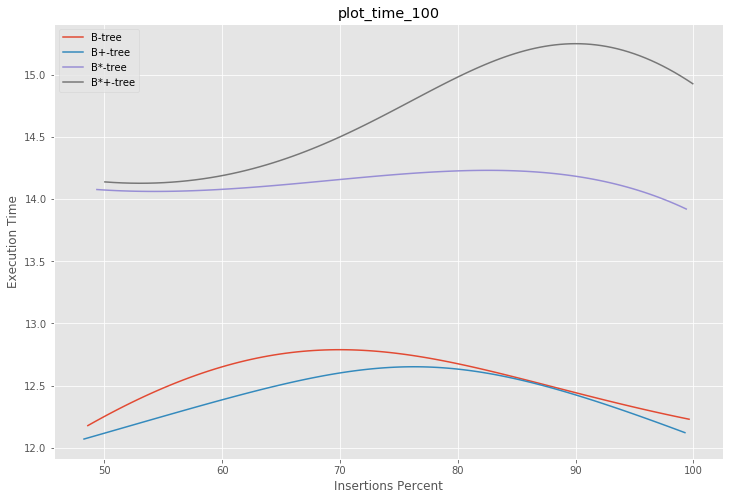

Tree order: 100, B-tree time mean: 12.5715236194
Tree order: 100, B+-tree time mean: 12.4411177645
Tree order: 100, B*-tree time mean: 14.1317365269
Tree order: 100, B*+-tree time mean: 14.6979374584
Tree order: 100, Average time mean: 13.4605788423


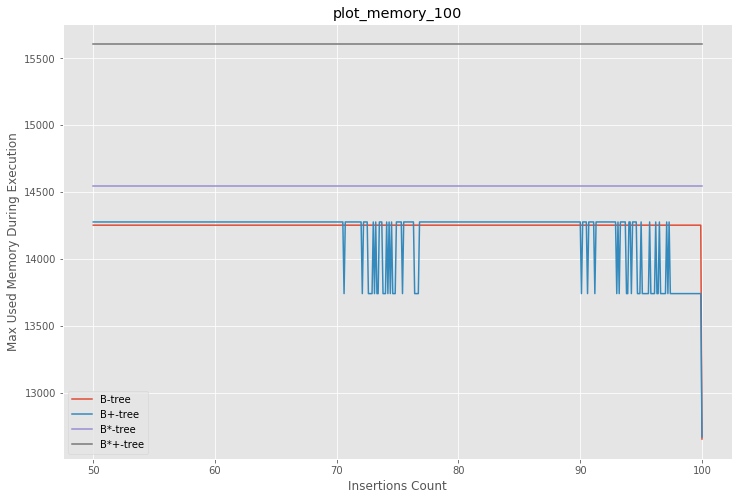

Tree order: 100, B-tree max used memory mean: 14249.8103792
Tree order: 100, B+-tree max used memory mean: 14191.5176314
Tree order: 100, B*-tree max used memory mean: 14543.0
Tree order: 100, B*+-tree max used memory mean: 15609.0
Tree order: 100, Average max used memory mean: 14648.3320027


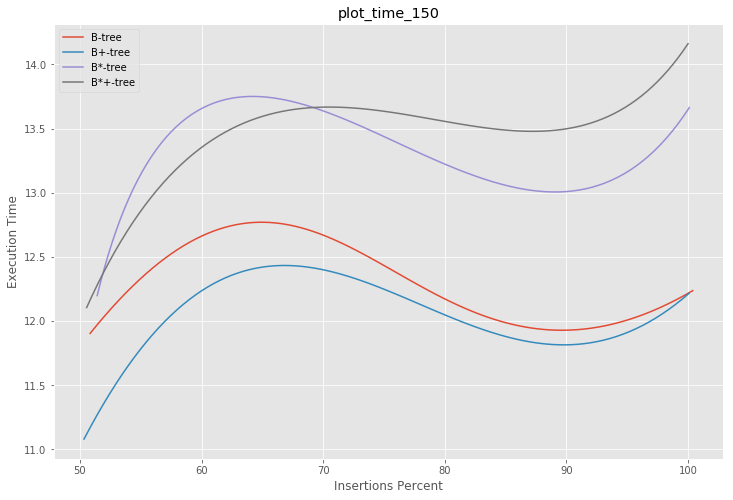

Tree order: 150, B-tree time mean: 12.2987358616
Tree order: 150, B+-tree time mean: 12.0392548237
Tree order: 150, B*-tree time mean: 13.2874251497
Tree order: 150, B*+-tree time mean: 13.4424484365
Tree order: 150, Average time mean: 12.7669660679


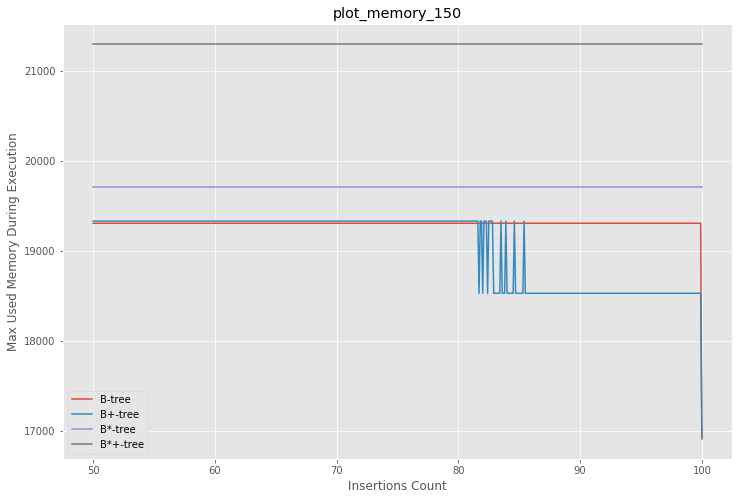

Tree order: 150, B-tree max used memory mean: 19304.2135729
Tree order: 150, B+-tree max used memory mean: 19056.0618762
Tree order: 150, B*-tree max used memory mean: 19711.0
Tree order: 150, B*+-tree max used memory mean: 21305.0
Tree order: 150, Average max used memory mean: 19844.0688623


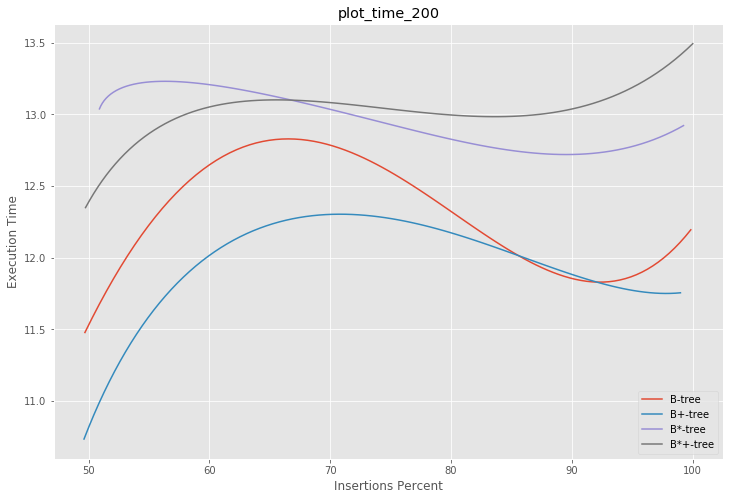

Tree order: 200, B-tree time mean: 12.3047238856
Tree order: 200, B+-tree time mean: 11.9614105123
Tree order: 200, B*-tree time mean: 12.9574184963
Tree order: 200, B*+-tree time mean: 13.0299401198
Tree order: 200, Average time mean: 12.5633732535


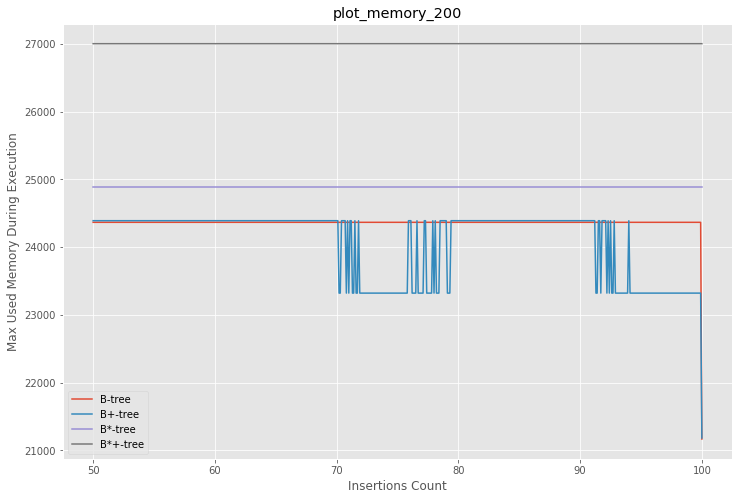

Tree order: 200, B-tree max used memory mean: 24358.6167665
Tree order: 200, B+-tree max used memory mean: 24071.1729874
Tree order: 200, B*-tree max used memory mean: 24879.0
Tree order: 200, B*+-tree max used memory mean: 27000.9973387
Tree order: 200, Average max used memory mean: 25077.4467731


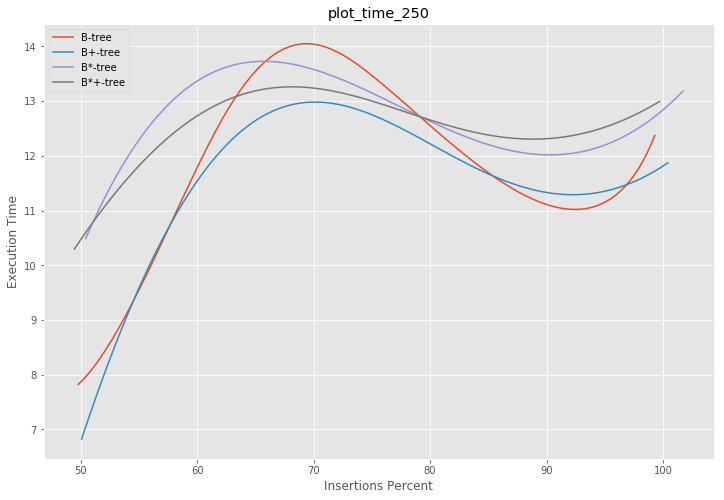

Tree order: 250, B-tree time mean: 11.9048569528
Tree order: 250, B+-tree time mean: 11.5522288756
Tree order: 250, B*-tree time mean: 12.6833000665
Tree order: 250, B*+-tree time mean: 12.5668662675
Tree order: 250, Average time mean: 12.1768130406


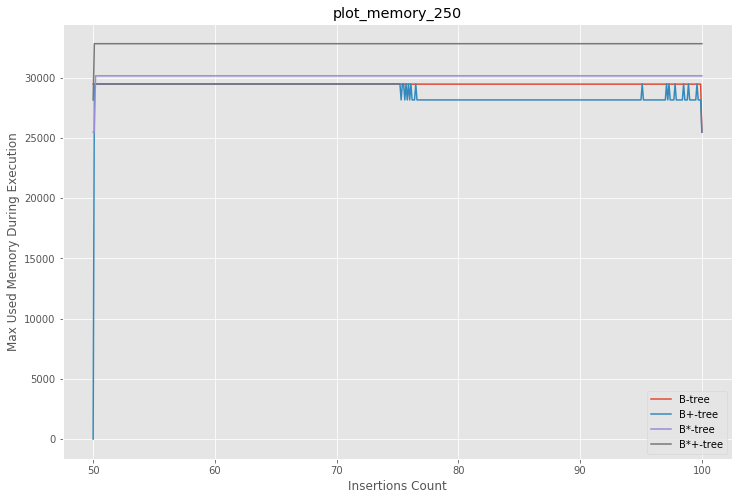

Tree order: 250, B-tree max used memory mean: 29445.0199601
Tree order: 250, B+-tree max used memory mean: 28786.4790419
Tree order: 250, B*-tree max used memory mean: 30124.338656
Tree order: 250, B*+-tree max used memory mean: 32799.6786427
Tree order: 250, Average max used memory mean: 30288.8790752


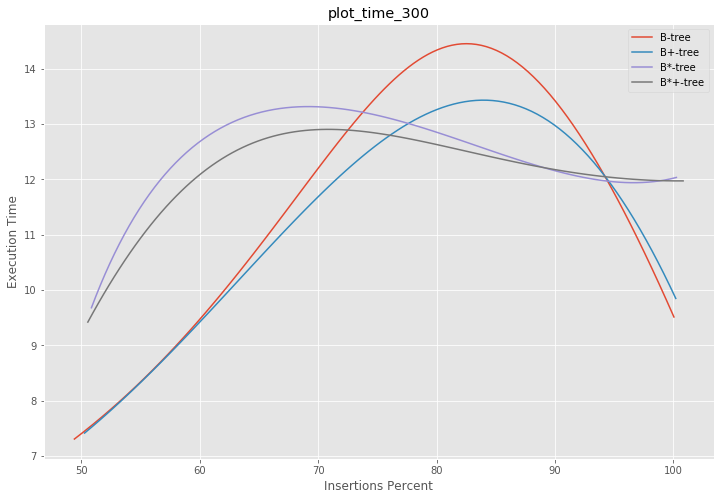

Tree order: 300, B-tree time mean: 11.6766467066
Tree order: 300, B+-tree time mean: 11.2987358616
Tree order: 300, B*-tree time mean: 12.4111776447
Tree order: 300, B*+-tree time mean: 12.1397205589
Tree order: 300, Average time mean: 11.8815701929


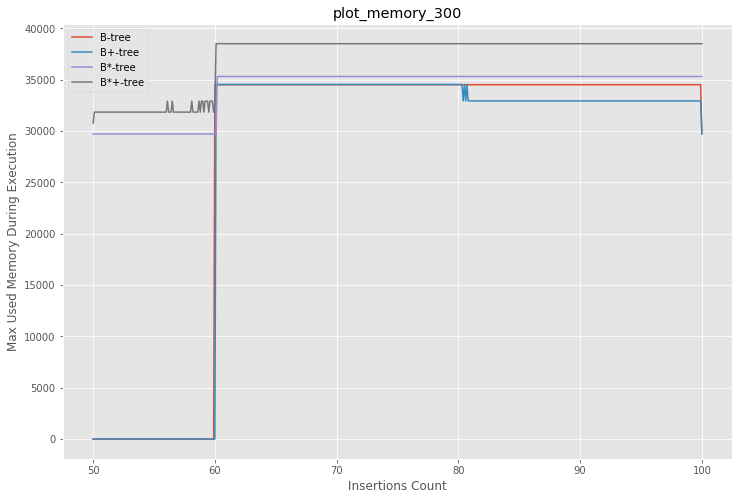

Tree order: 300, B-tree max used memory mean: 27611.3992016
Tree order: 300, B+-tree max used memory mean: 26941.3293413
Tree order: 300, B*-tree max used memory mean: 34170.4703925
Tree order: 300, B*+-tree max used memory mean: 37187.089155
Tree order: 300, Average max used memory mean: 31477.5720226


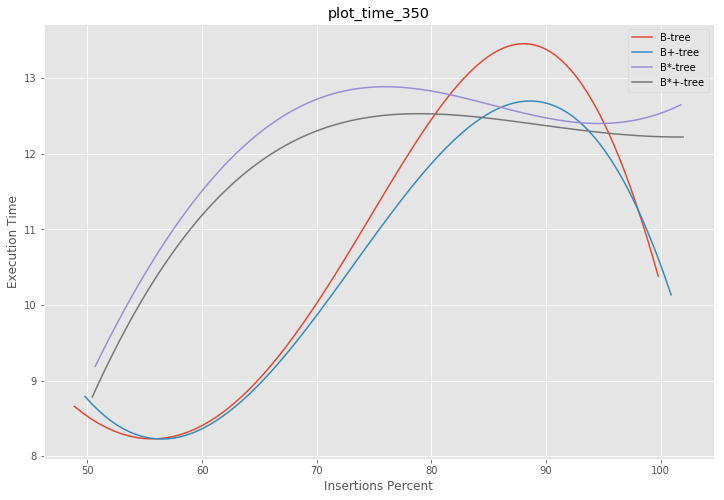

Tree order: 350, B-tree time mean: 10.8030605456
Tree order: 350, B+-tree time mean: 10.5202927478
Tree order: 350, B*-tree time mean: 12.1004657352
Tree order: 350, B*+-tree time mean: 11.8203592814
Tree order: 350, Average time mean: 11.3110445775


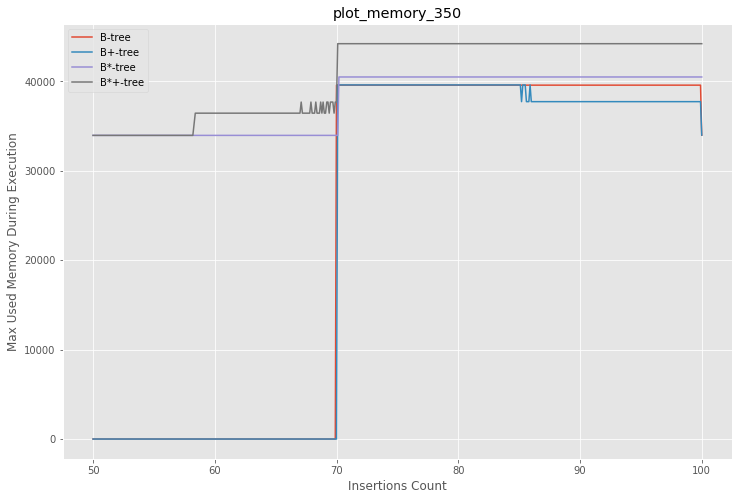

Tree order: 350, B-tree max used memory mean: 23759.4151697
Tree order: 350, B+-tree max used memory mean: 23157.6966068
Tree order: 350, B*-tree max used memory mean: 37846.1457086
Tree order: 350, B*+-tree max used memory mean: 40700.245509
Tree order: 350, Average max used memory mean: 31365.8757485


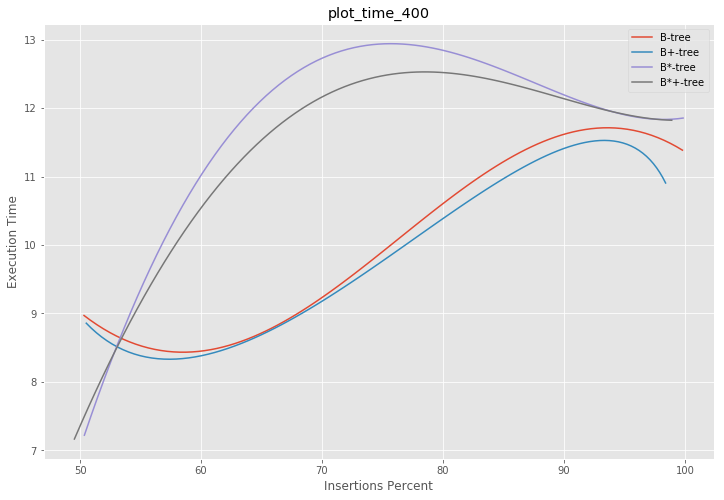

Tree order: 400, B-tree time mean: 10.0139720559
Tree order: 400, B+-tree time mean: 9.84564204923
Tree order: 400, B*-tree time mean: 11.7278775782
Tree order: 400, B*+-tree time mean: 11.4544244844
Tree order: 400, Average time mean: 10.7604790419


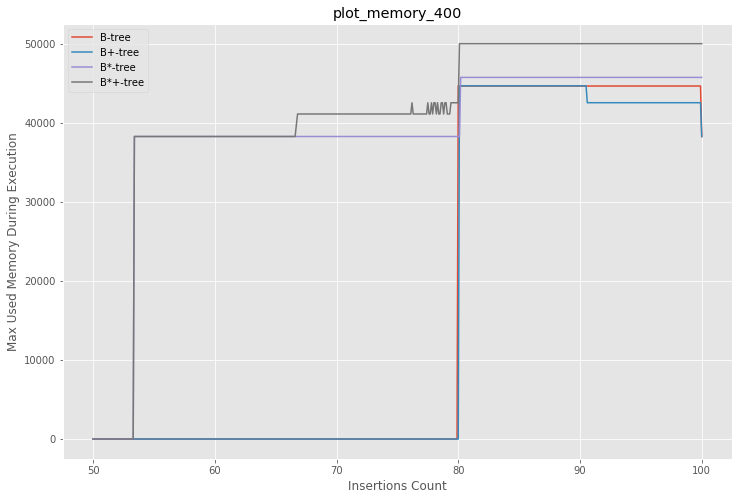

Tree order: 400, B-tree max used memory mean: 17901.9061876
Tree order: 400, B+-tree max used memory mean: 17421.7019295
Tree order: 400, B*-tree max used memory mean: 38640.6167665
Tree order: 400, B*+-tree max used memory mean: 41165.3659348
Tree order: 400, Average max used memory mean: 28782.3977046


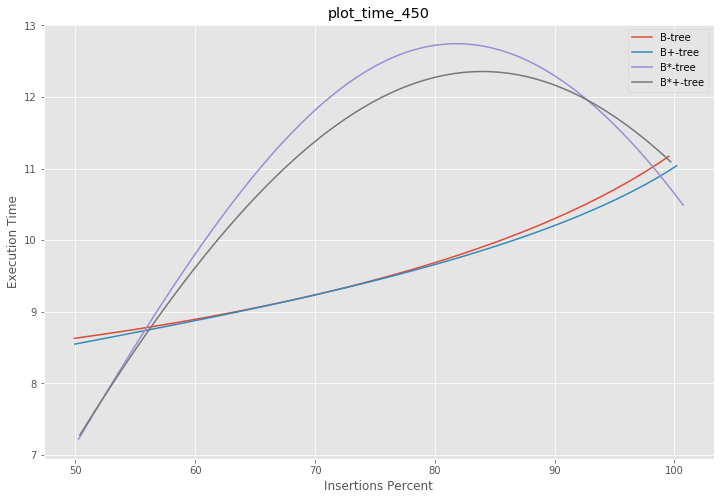

Tree order: 450, B-tree time mean: 9.59481037924
Tree order: 450, B+-tree time mean: 9.54091816367
Tree order: 450, B*-tree time mean: 11.1869594145
Tree order: 450, B*+-tree time mean: 10.9780439122
Tree order: 450, Average time mean: 10.3251829674


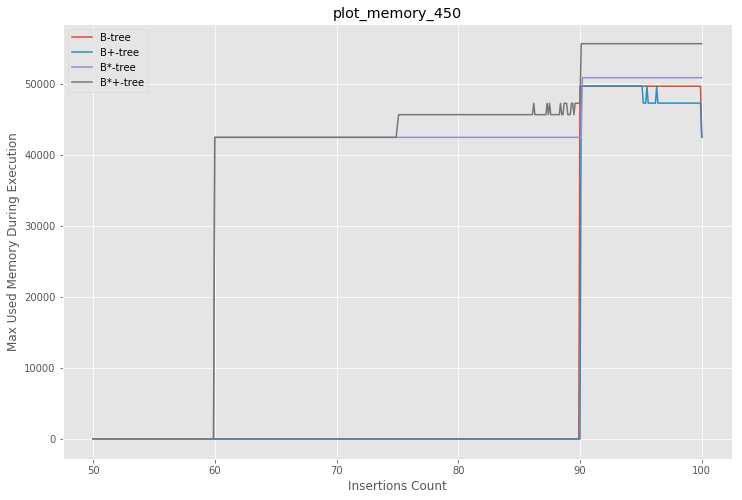

Tree order: 450, B-tree max used memory mean: 10006.8083832
Tree order: 450, B+-tree max used memory mean: 9691.82035928
Tree order: 450, B*-tree max used memory mean: 35684.4451098
Tree order: 450, B*+-tree max used memory mean: 37663.6706587
Tree order: 450, Average max used memory mean: 23261.6861277


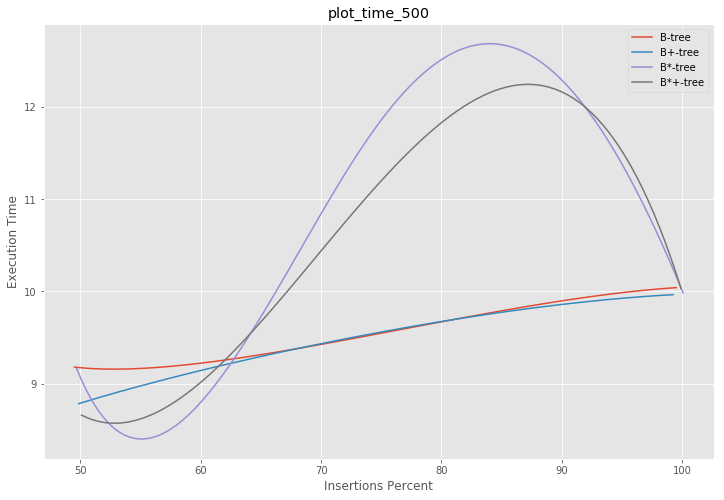

Tree order: 500, B-tree time mean: 9.56154357951
Tree order: 500, B+-tree time mean: 9.50232867598
Tree order: 500, B*-tree time mean: 10.8023952096
Tree order: 500, B*+-tree time mean: 10.6121091151
Tree order: 500, Average time mean: 10.119594145


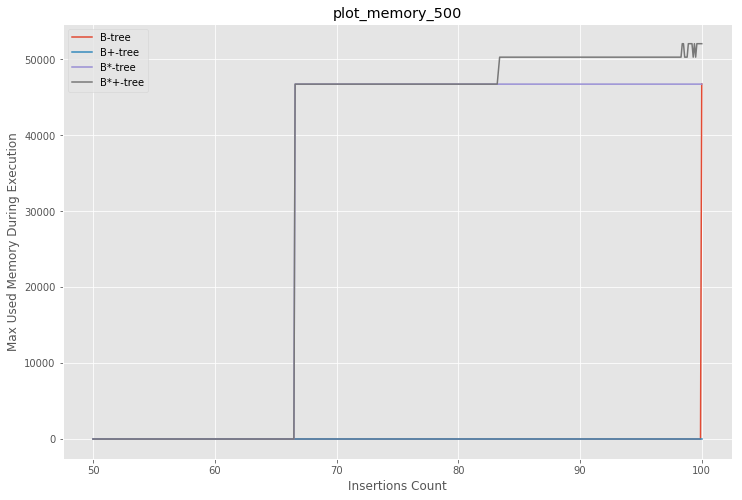

Tree order: 500, B-tree max used memory mean: 93.3473053892
Tree order: 500, B+-tree max used memory mean: 0.0
Tree order: 500, B*-tree max used memory mean: 31259.3113772
Tree order: 500, B*+-tree max used memory mean: 32488.9334664
Tree order: 500, Average max used memory mean: 15960.3980373


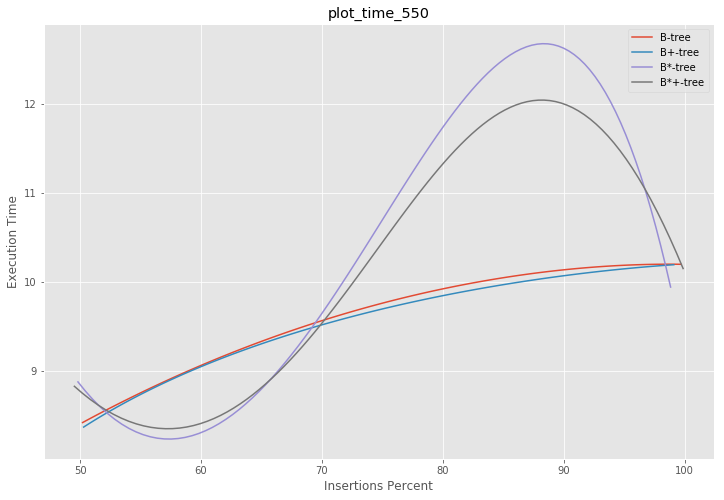

Tree order: 550, B-tree time mean: 9.61011310712
Tree order: 550, B+-tree time mean: 9.56420492349
Tree order: 550, B*-tree time mean: 10.3532934132
Tree order: 550, B*+-tree time mean: 10.1776447106
Tree order: 550, Average time mean: 9.92631403859


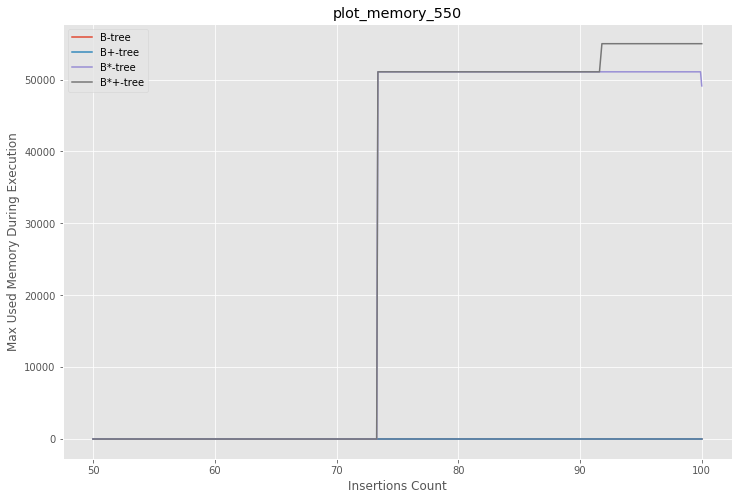

Tree order: 550, B-tree max used memory mean: 0.0
Tree order: 550, B+-tree max used memory mean: 0.0
Tree order: 550, B*-tree max used memory mean: 27212.5076514
Tree order: 550, B*+-tree max used memory mean: 27868.6353959
Tree order: 550, Average max used memory mean: 13770.2857618


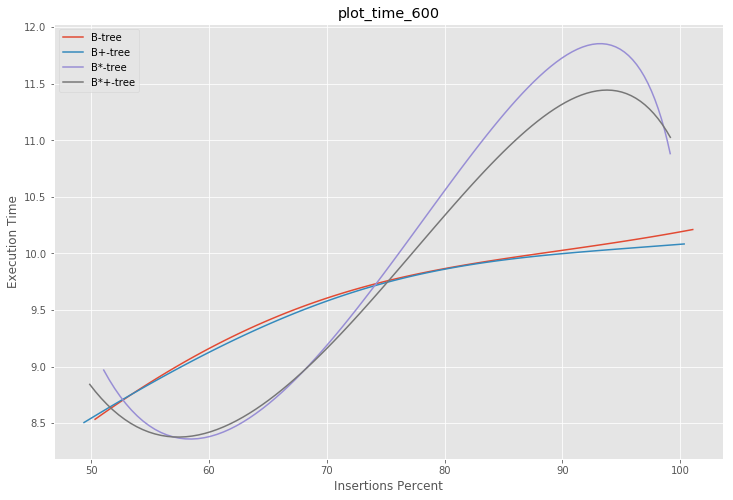

Tree order: 600, B-tree time mean: 9.61077844311
Tree order: 600, B+-tree time mean: 9.58416500333
Tree order: 600, B*-tree time mean: 9.98203592814
Tree order: 600, B*+-tree time mean: 9.82967398536
Tree order: 600, Average time mean: 9.75166333999


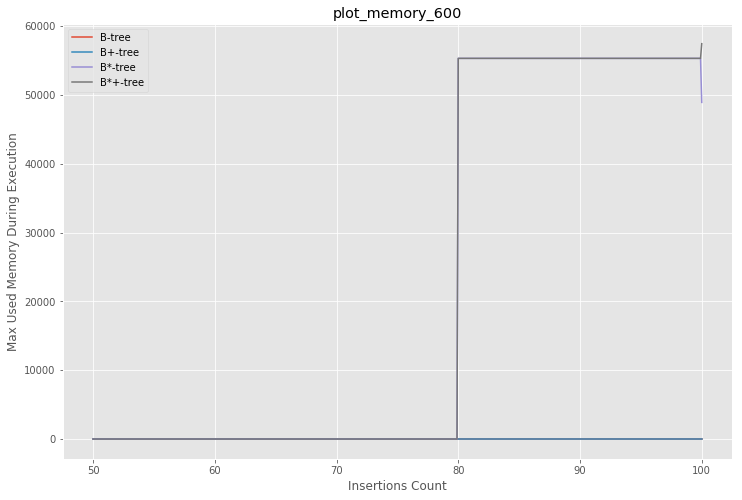

Tree order: 600, B-tree max used memory mean: 0.0
Tree order: 600, B+-tree max used memory mean: 0.0
Tree order: 600, B*-tree max used memory mean: 22177.0678643
Tree order: 600, B*+-tree max used memory mean: 22194.095143
Tree order: 600, Average max used memory mean: 11092.7907518


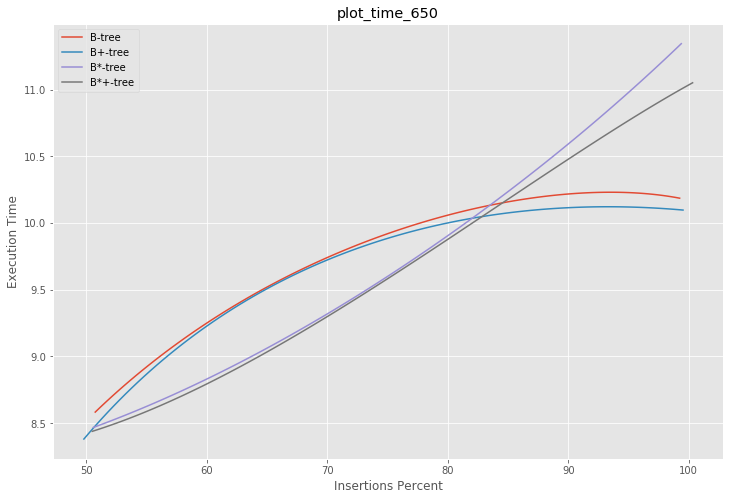

Tree order: 650, B-tree time mean: 9.74051896208
Tree order: 650, B+-tree time mean: 9.68130405855
Tree order: 650, B*-tree time mean: 9.70525615436
Tree order: 650, B*+-tree time mean: 9.63206919494
Tree order: 650, Average time mean: 9.68978709248


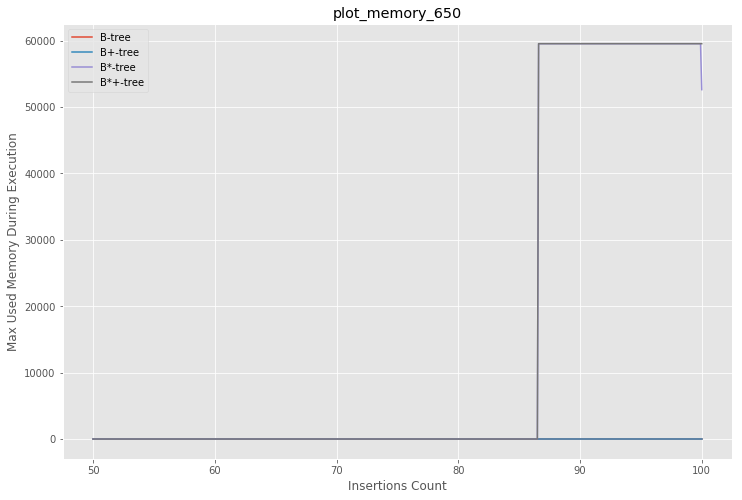

Tree order: 650, B-tree max used memory mean: 0.0
Tree order: 650, B+-tree max used memory mean: 0.0
Tree order: 650, B*-tree max used memory mean: 16032.3133733
Tree order: 650, B*+-tree max used memory mean: 16046.1377246
Tree order: 650, Average max used memory mean: 8019.61277445


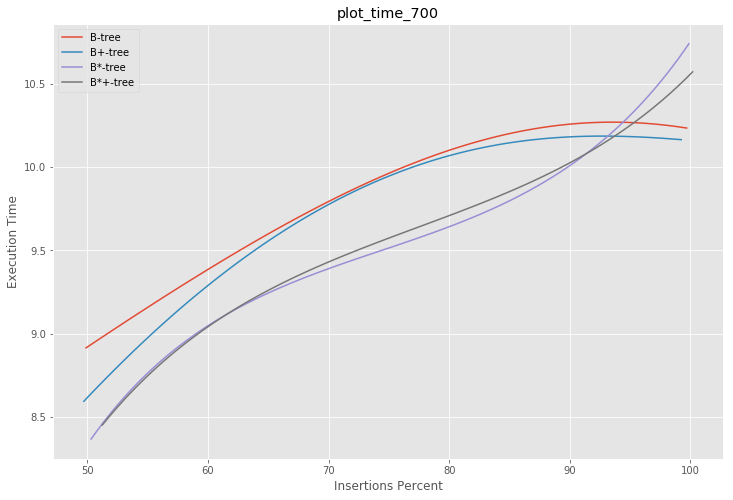

Tree order: 700, B-tree time mean: 9.83166999335
Tree order: 700, B+-tree time mean: 9.75316034597
Tree order: 700, B*-tree time mean: 9.5256154358
Tree order: 700, B*+-tree time mean: 9.53426480373
Tree order: 700, Average time mean: 9.66117764471


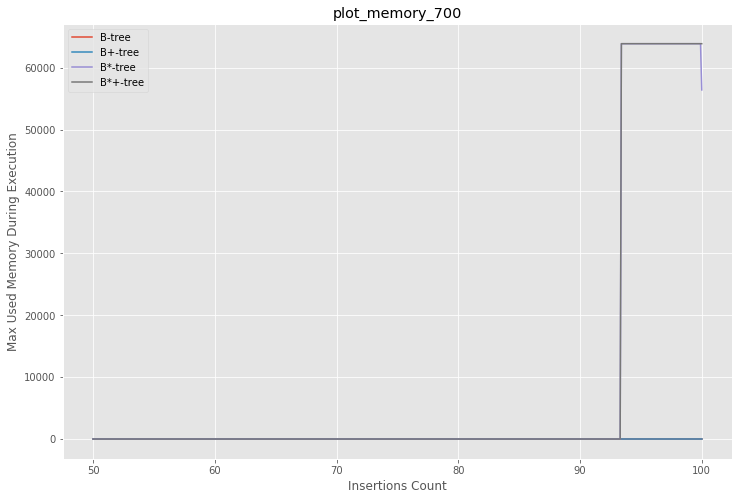

Tree order: 700, B-tree max used memory mean: 0.0
Tree order: 700, B+-tree max used memory mean: 0.0
Tree order: 700, B*-tree max used memory mean: 8526.45309381
Tree order: 700, B*+-tree max used memory mean: 8541.36327345
Tree order: 700, Average max used memory mean: 4266.95409182


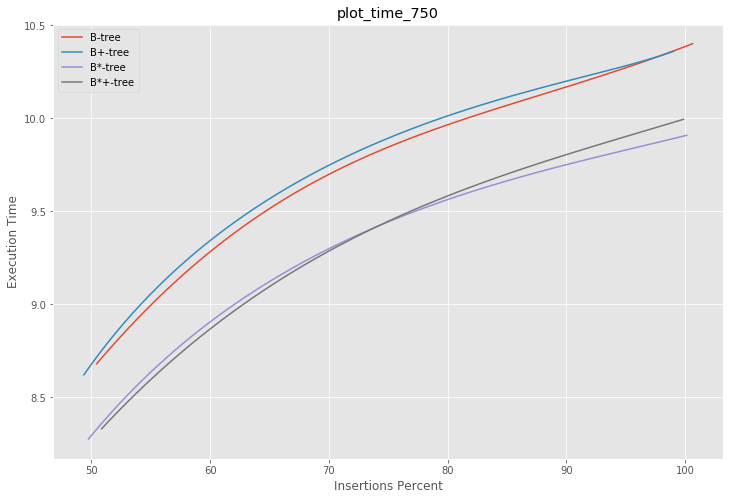

Tree order: 750, B-tree time mean: 9.73453093812
Tree order: 750, B+-tree time mean: 9.77644710579
Tree order: 750, B*-tree time mean: 9.33333333333
Tree order: 750, B*+-tree time mean: 9.34331337325
Tree order: 750, Average time mean: 9.54690618762


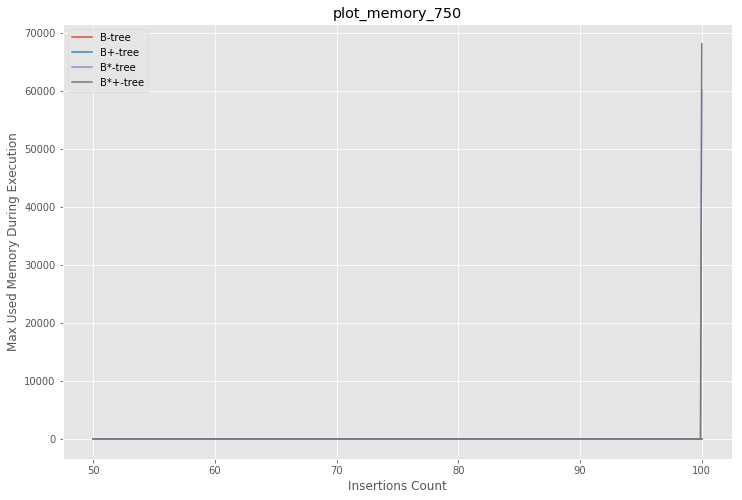

Tree order: 750, B-tree max used memory mean: 0.0
Tree order: 750, B+-tree max used memory mean: 0.0
Tree order: 750, B*-tree max used memory mean: 119.982035928
Tree order: 750, B*+-tree max used memory mean: 135.946107784
Tree order: 750, Average max used memory mean: 63.9820359281


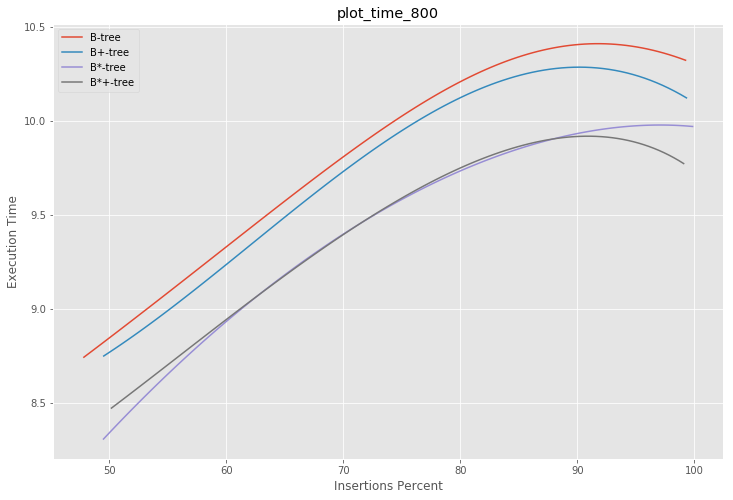

Tree order: 800, B-tree time mean: 9.87691284098
Tree order: 800, B+-tree time mean: 9.7744510978
Tree order: 800, B*-tree time mean: 9.44178310047
Tree order: 800, B*+-tree time mean: 9.43579507651
Tree order: 800, Average time mean: 9.63223552894


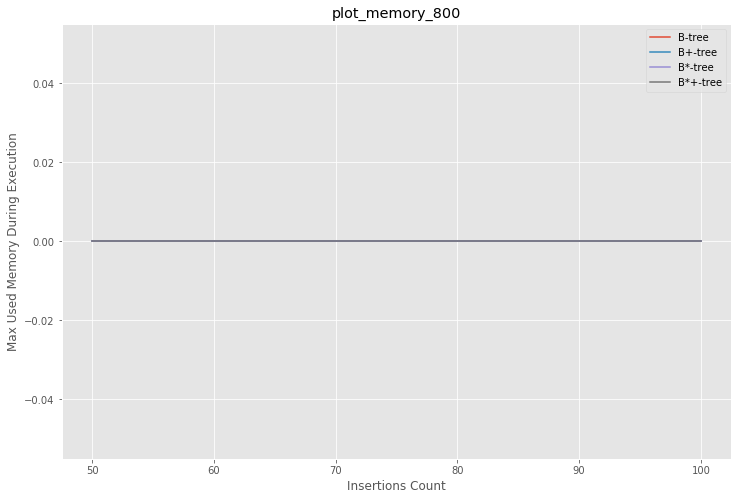

Tree order: 800, B-tree max used memory mean: 0.0
Tree order: 800, B+-tree max used memory mean: 0.0
Tree order: 800, B*-tree max used memory mean: 0.0
Tree order: 800, B*+-tree max used memory mean: 0.0
Tree order: 800, Average max used memory mean: 0.0


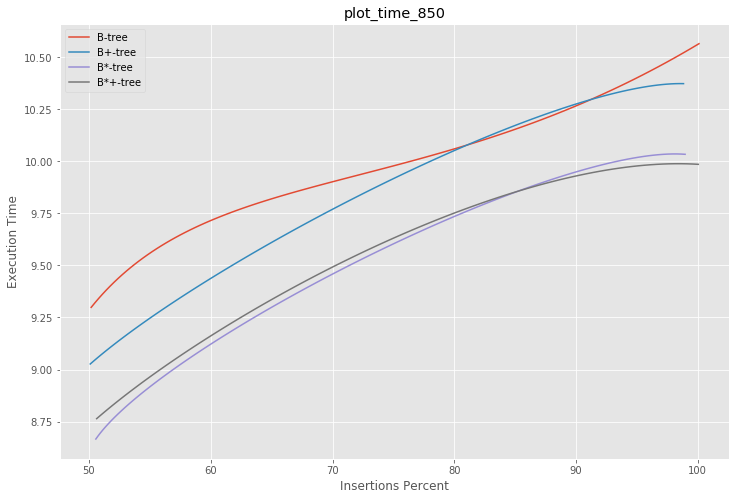

Tree order: 850, B-tree time mean: 9.97937458417
Tree order: 850, B+-tree time mean: 9.85495675316
Tree order: 850, B*-tree time mean: 9.53160345975
Tree order: 850, B*+-tree time mean: 9.54757152362
Tree order: 850, Average time mean: 9.72837658017


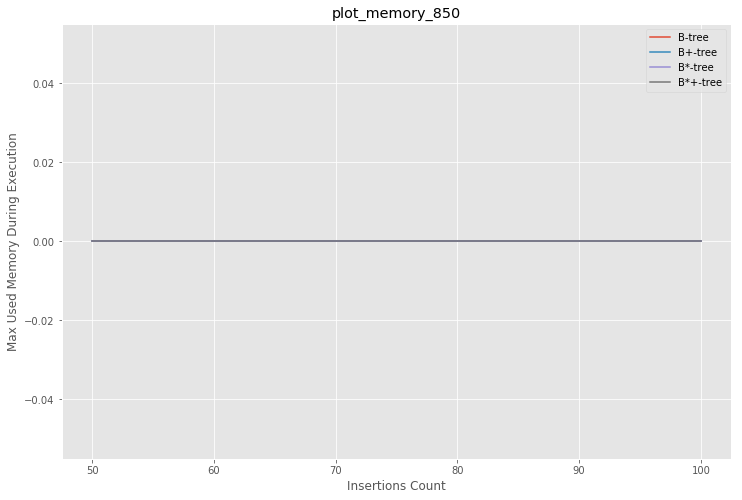

Tree order: 850, B-tree max used memory mean: 0.0
Tree order: 850, B+-tree max used memory mean: 0.0
Tree order: 850, B*-tree max used memory mean: 0.0
Tree order: 850, B*+-tree max used memory mean: 0.0
Tree order: 850, Average max used memory mean: 0.0


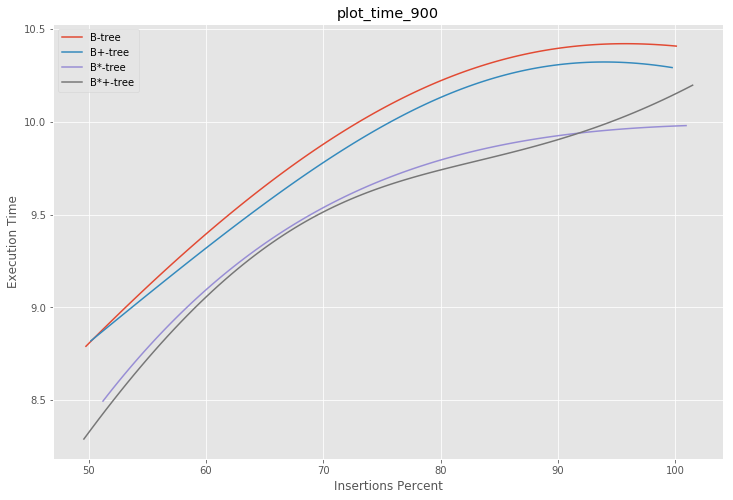

Tree order: 900, B-tree time mean: 9.91017964072
Tree order: 900, B+-tree time mean: 9.82701264138
Tree order: 900, B*-tree time mean: 9.52029274784
Tree order: 900, B*+-tree time mean: 9.49833666001
Tree order: 900, Average time mean: 9.68895542249


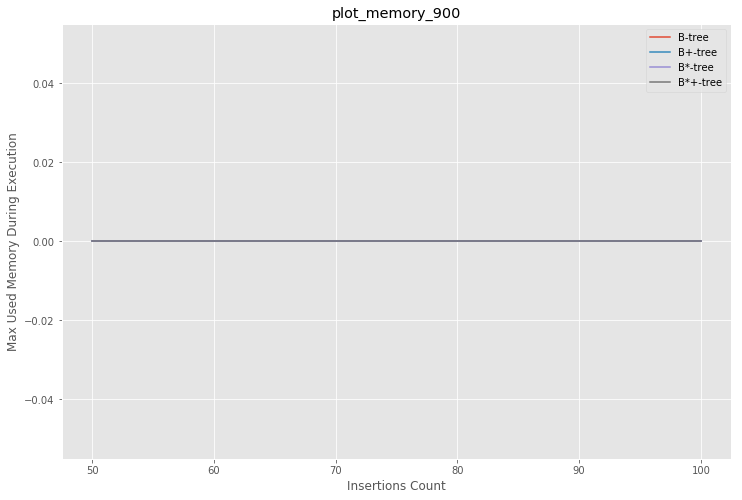

Tree order: 900, B-tree max used memory mean: 0.0
Tree order: 900, B+-tree max used memory mean: 0.0
Tree order: 900, B*-tree max used memory mean: 0.0
Tree order: 900, B*+-tree max used memory mean: 0.0
Tree order: 900, Average max used memory mean: 0.0


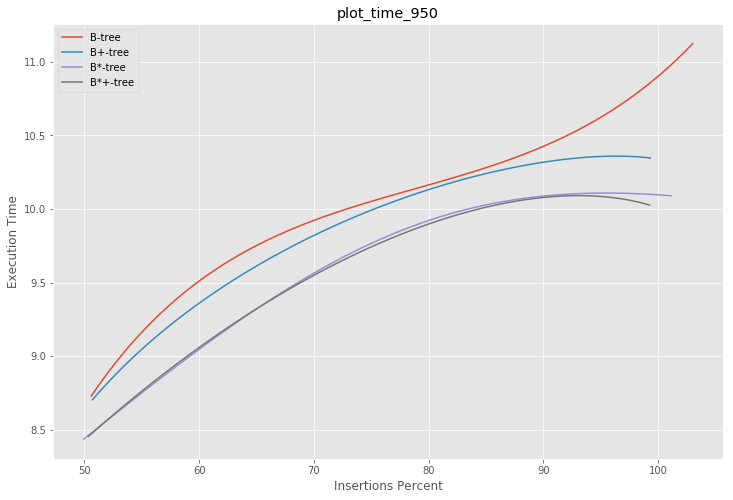

Tree order: 950, B-tree time mean: 9.96872920825
Tree order: 950, B+-tree time mean: 9.84031936128
Tree order: 950, B*-tree time mean: 9.58815701929
Tree order: 950, B*+-tree time mean: 9.57618097139
Tree order: 950, Average time mean: 9.74334664005


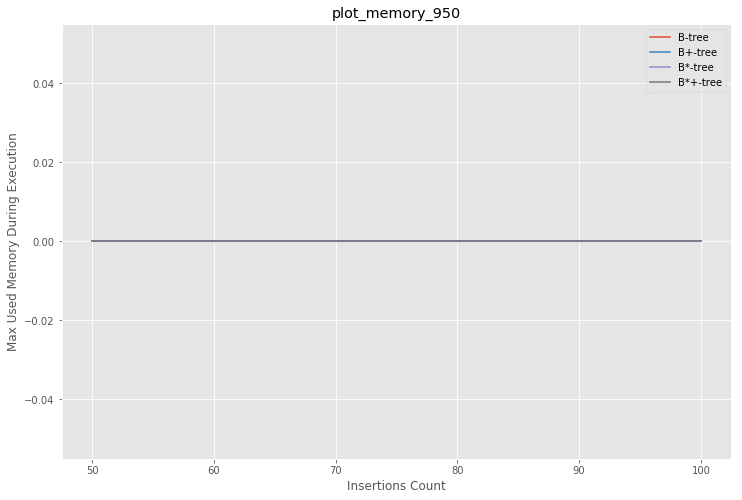

Tree order: 950, B-tree max used memory mean: 0.0
Tree order: 950, B+-tree max used memory mean: 0.0
Tree order: 950, B*-tree max used memory mean: 0.0
Tree order: 950, B*+-tree max used memory mean: 0.0
Tree order: 950, Average max used memory mean: 0.0


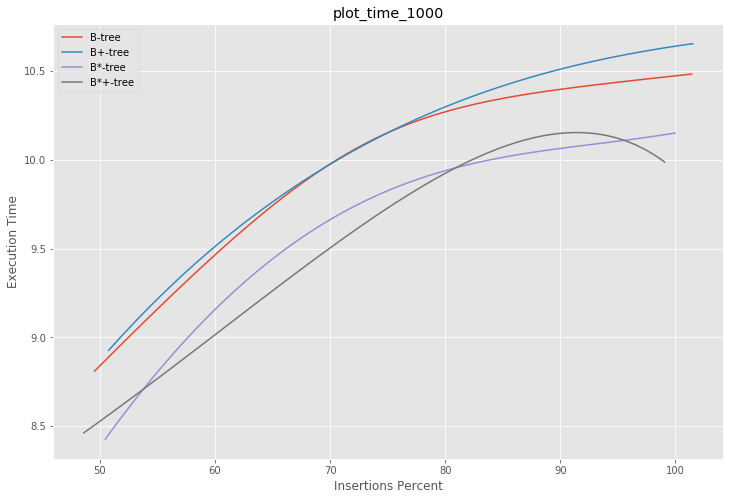

Tree order: 1000, B-tree time mean: 9.9620758483
Tree order: 1000, B+-tree time mean: 10.0206254158
Tree order: 1000, B*-tree time mean: 9.63073852295
Tree order: 1000, B*+-tree time mean: 9.58150365935
Tree order: 1000, Average time mean: 9.79873586161


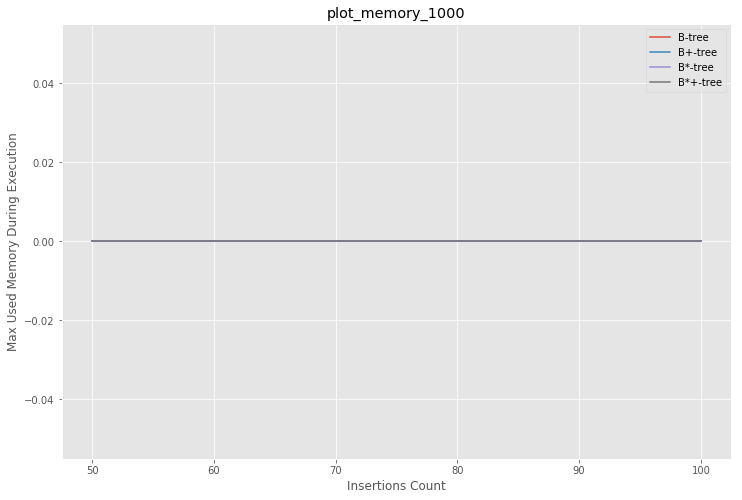

Tree order: 1000, B-tree max used memory mean: 0.0
Tree order: 1000, B+-tree max used memory mean: 0.0
Tree order: 1000, B*-tree max used memory mean: 0.0
Tree order: 1000, B*+-tree max used memory mean: 0.0
Tree order: 1000, Average max used memory mean: 0.0


In [130]:
for tree_order in tree_orders.tolist():
    plot_time_for_tree_order(tree_order)
    plot_memory_for_tree_order(tree_order)

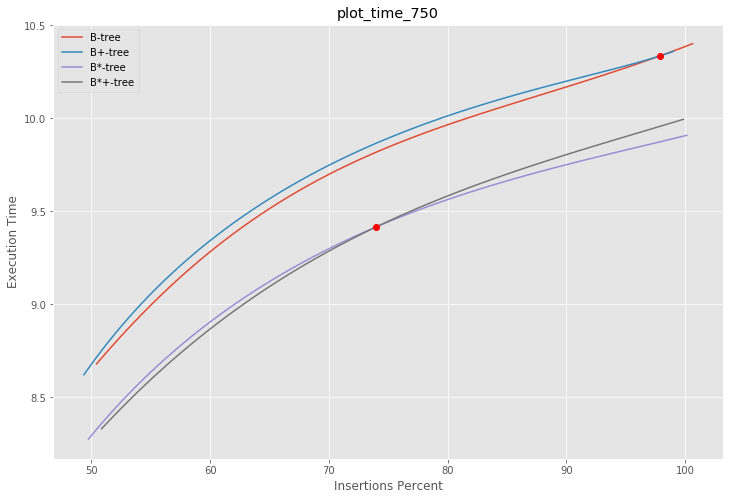

Tree order: 750, B-tree time mean: 9.73453093812
Tree order: 750, B+-tree time mean: 9.77644710579
Tree order: 750, B*-tree time mean: 9.33333333333
Tree order: 750, B*+-tree time mean: 9.34331337325
Tree order: 750, Average time mean: 9.54690618762
Intersections between B-tree and B+-tree plots: (97.83783579664832, 10.334630183907713)
Intersections between B*-tree and B*+-tree plots: (73.97421880708475, 9.415793844617816)


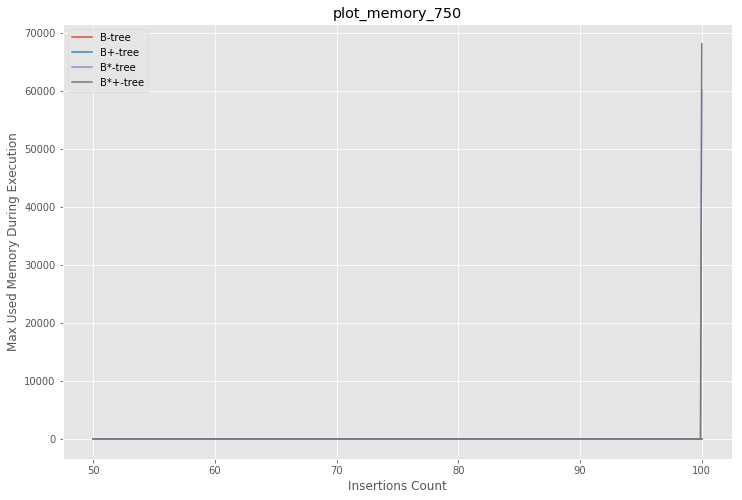

Tree order: 750, B-tree max used memory mean: 0.0
Tree order: 750, B+-tree max used memory mean: 0.0
Tree order: 750, B*-tree max used memory mean: 119.982035928
Tree order: 750, B*+-tree max used memory mean: 135.946107784
Tree order: 750, Average max used memory mean: 63.9820359281


In [132]:
plot_time_for_tree_order(tree_order=750, need_intersections=True)
plot_memory_for_tree_order(750)